In [1]:
import os
import sys 
sys.path.insert(0, '/home/aiwenxu/2022-xu-retinal-degeneration')

**Part 1: running retina simulation**

In [2]:
import numpy as np
from model.retinasim_phase12.simulation import stim_to_retina_output
from model.retinasim_phase12.simulation_utils import SimulationParam
import pickle
from brian2 import *

In [3]:
pre_computed_weights_folder = "../model/weights_phase12"

# for light_g_max in [0.9, 0.75, 0.6, 0.45, 0.3, 0.15, 0]:
#     for cone_population in [100, 80, 60, 40, 20]:
for light_g_max in [0.9]:
    for cone_population in [100]:
        for light_intensity in [1, 0.75, 0.5, 0.25, 0]:
        
            sp_txt = "../model/parameter/cottaris_original_2hz.txt"
            sp = SimulationParam(sp_txt)

            sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
            sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)

            cr_coordinates = np.load("{}/CR.npy".format(sp.xy_coord_folder))
            NUM_CR = cr_coordinates.shape[1]
            
            background_light = np.tile(np.ones((NUM_CR)) * 0.5, (500, 1))
            part = np.ones((NUM_CR)) * light_intensity
            part = np.tile(part, (2000, 1))                
            square_waves = [background_light, part]
            stim = TimedArray(np.concatenate(square_waves, axis=0), dt=1*ms)

            time_in_ms = stim.values.shape[0]
            print("retina sim total time:", time_in_ms)
            select_GPU = 1
            genn_directory = "GeNNworkspace_{}".format(select_GPU)
            _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = stim_to_retina_output(time_in_ms, sp, light_g_max, pre_computed_weights_folder, lstim=stim, select_GPU=select_GPU, genn_directory=genn_directory, dt=0.1)

            data_folder = "../data/fig_heatmap_new/data-{}-{}-{}".format(light_g_max, cone_population, light_intensity)
            if not os.path.exists(data_folder):
                os.makedirs(data_folder)

            with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
                pickle.dump(spikes_gl_on, f)

            with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
                pickle.dump(spikes_gl_off, f)

retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 256.7625651359558
retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 254.67365765571594
retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn

In [3]:
# special case: cone population 0%

pre_computed_weights_folder = "../model/weights_phase12"

cone_population = 0
for light_g_max in [0.9, 0.75, 0.6, 0.45, 0.3, 0.15, 0]:
    for light_intensity in [1, 0.75, 0.5, 0.25, 0]:
        
        sp_txt = "../model/parameter/cottaris_original_2hz.txt"
        sp = SimulationParam(sp_txt)

        sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(100)
        sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(100)
        sp.cone_exists = False

        NUM_CR = 1

        background_light = np.tile(np.ones((NUM_CR)) * 0.5, (500, 1))
        part = np.ones((NUM_CR)) * light_intensity
        part = np.tile(part, (2000, 1))                
        square_waves = [background_light, part]
        stim = TimedArray(np.concatenate(square_waves, axis=0), dt=1*ms)

        time_in_ms = stim.values.shape[0]
        print("retina sim total time:", time_in_ms)
        select_GPU = 1
        genn_directory = "GeNNworkspace_{}".format(select_GPU)
        _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = stim_to_retina_output(time_in_ms, sp, light_g_max, pre_computed_weights_folder, lstim=stim, select_GPU=select_GPU, genn_directory=genn_directory, dt=0.1)

        data_folder = "../data/fig_heatmap_new/data-{}-{}-{}".format(light_g_max, cone_population, light_intensity)
        if not os.path.exists(data_folder):
            os.makedirs(data_folder)

        with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
            pickle.dump(spikes_gl_on, f)

        with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
            pickle.dump(spikes_gl_off, f)

retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 123.13363122940063
retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 120.50594067573547
retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/gen

executing genn binary on GPU ...
simulation time: 121.52660727500916
retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 120.93157696723938
retina sim total time: 2500
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 120.54215717315674
retina sim total time: 2500
running brian

**Part 2: calculate firing rate**

In [4]:
def cal_firing_rate(path_to_spikes):
    
    with open(path_to_spikes, 'rb') as f:
        spikes = pickle.load(f)
    
    data = np.zeros((len(spikes['t'].keys())))
    for idx in spikes['t']:
        sp = spikes['t'][idx] / ms
        sp = sp[sp > 500]
        data[idx] += sp.shape[0]/2
    return data

In [5]:
def save_firing_rate(cell_type):
    fr_dict = {}
    for light_g in [0.9, 0.75, 0.6, 0.45, 0.3, 0.15, 0]:
        for cone_percent in [0, 20, 40, 60, 80, 100]:
            for light_intensity in [1, 0.75, 0.5, 0.25, 0]:
                current_key = "{}_{}_{}".format(light_g, cone_percent, light_intensity)
                current_folder = "../data/fig_heatmap_new/data-{}-{}-{}".format(light_g, cone_percent, light_intensity)
                current_path = "{}/spikes_gl_{}.pickle".format(current_folder, cell_type)
                fr_dict[current_key] = cal_firing_rate(current_path)
    with open("../data/fig_heatmap_new/{}_rgc_fr.pickle".format(cell_type), 'wb') as f:
        pickle.dump(fr_dict, f)

In [6]:
save_firing_rate("on")

In [7]:
save_firing_rate("off")

**Part 3: plotting**

In [8]:
with open("../data/fig_heatmap_new/on_rgc_fr.pickle", 'rb') as f:
    on_fr = pickle.load(f)
with open("../data/fig_heatmap_new/off_rgc_fr.pickle", 'rb') as f:
    off_fr = pickle.load(f)

In [9]:
def get_heatmap(fr_dict):
    heatmap = []
    for light_intensity in [0, 0.25, 0.5, 0.75, 1]:
        current = np.zeros((7, 6))
        for (j, light_g) in enumerate(reversed([0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9])):
            for (k, cone_percent) in enumerate(reversed([0, 20, 40, 60, 80, 100])):
                key = "{}_{}_{}".format(light_g, cone_percent, light_intensity)
                current[j][k] = np.mean(fr_dict[key], axis=0)
        heatmap.append(current)
    return heatmap

In [10]:
on_off_heatmap = [get_heatmap(on_fr), get_heatmap(off_fr)]

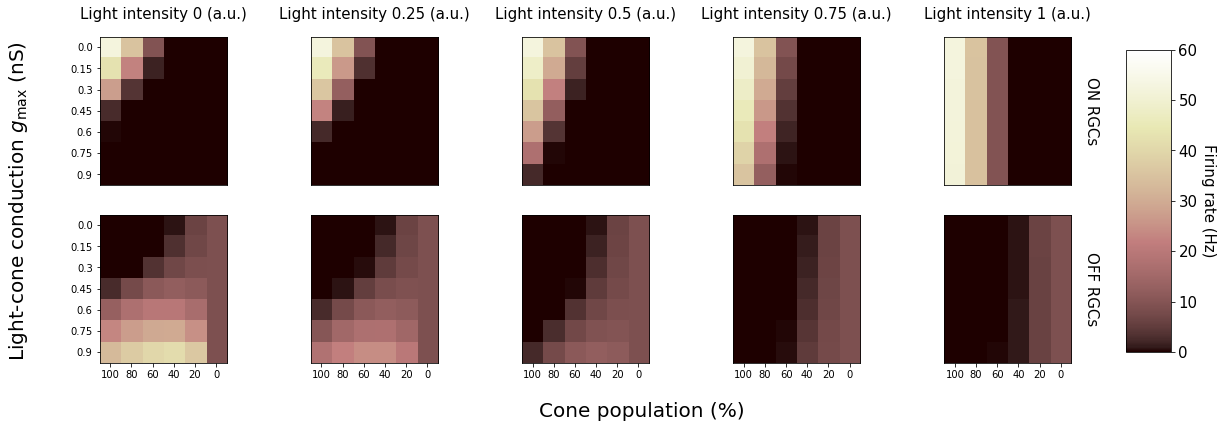

In [20]:
fig, axs = plt.subplots(2, 5, figsize=(21,6))
fig.text(0.5, 0, 'Cone population (%)', ha='center', fontsize=20)
fig.text(0.08, 0.5, 'Light-cone conduction $g_{\max}$ (nS)', va='center', rotation='vertical', fontsize=20)
light_intensity = [0, 0.25, 0.5, 0.75, 1]
for i in range(2):
    for j in range(5):
        im = axs[i][j].imshow(on_off_heatmap[i][j], cmap="pink", vmin=0, vmax=60, origin="lower")
        if i == 0:
            axs[i][j].set_xticks([])
        else:
            axs[i][j].set_xticks([0, 1, 2, 3, 4, 5])
            axs[i][j].set_xticklabels(reversed([0, 20, 40, 60, 80, 100]), fontsize=10)
        if j != 0:
            axs[i][j].set_yticks([])
        else:
            axs[i][j].set_yticks([0, 1, 2, 3, 4, 5, 6])
            axs[i][j].set_yticklabels(reversed([0.00, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90]), fontsize=10)
        if i == 0:
            axs[i][j].set_xlabel("Light intensity {} (a.u.)".format(light_intensity[j]), fontsize=15)
            axs[i][j].xaxis.set_label_coords(0.5,1.2)
axs[0][4].set_ylabel("ON RGCs", rotation=270, fontsize=15)
axs[0][4].yaxis.set_label_coords(1.1,0.5)
axs[1][4].set_ylabel("OFF RGCs", rotation=270, fontsize=15)
axs[1][4].yaxis.set_label_coords(1.1,0.5)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('Firing rate (Hz)', rotation=270, labelpad=18, fontsize=15)
_ = cbar_ax.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=15)
plt.savefig("new_plots/spon_rate_on_off_heatmap.pdf")

In [16]:
def get_spon_rate_fix_cone_percent(fr_dict, cone_percent):
    fr_mean = []
    fr_std = []
    for g_max in reversed([0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9]):
        key = "{}_{}_0.5".format(g_max, cone_percent)
        rate = fr_dict[key]
        fr_mean.append(np.mean(rate))
        fr_std.append(np.std(rate))
    return np.array(fr_mean), np.array(fr_std)
on_fr_mean, on_fr_std = get_spon_rate_fix_cone_percent(on_fr, 100)
off_fr_mean, off_fr_std = get_spon_rate_fix_cone_percent(off_fr, 100)

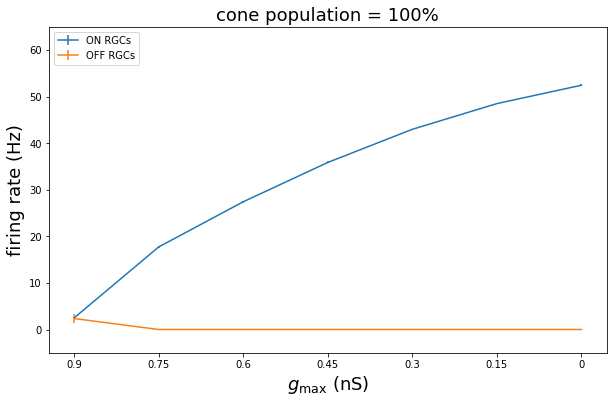

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

gmax = list(reversed(["0", "0.15", "0.3", "0.45", "0.6", "0.75", "0.9"]))

ax.errorbar(gmax, on_fr_mean, yerr=on_fr_std, label="ON RGCs")
ax.errorbar(gmax, off_fr_mean, yerr=off_fr_std, label="OFF RGCs")
ax.set_ylim((-5,65))
ax.set_ylabel("firing rate (Hz)", fontsize=18)
ax.set_xlabel("$g_{\max}$ (nS)", fontsize=18)
ax.set_title("cone population = 100%", fontsize=18)
ax.legend(loc="upper left")
plt.savefig("new_plots/spon_rate_cone_100_varying_g_max.pdf")

In [18]:
def get_spon_rate_fix_g_max(fr_dict, g_max):
    fr_mean = []
    fr_std = []
    for cone_percent in reversed([0, 20, 40, 60, 80, 100]):
        key = "{}_{}_0.5".format(g_max, cone_percent)
        rate = fr_dict[key]
        fr_mean.append(np.mean(rate))
        fr_std.append(np.std(rate))
    return np.array(fr_mean), np.array(fr_std)
on_fr_mean, on_fr_std = get_spon_rate_fix_g_max(on_fr, 0.9)
off_fr_mean, off_fr_std = get_spon_rate_fix_g_max(off_fr, 0.9)

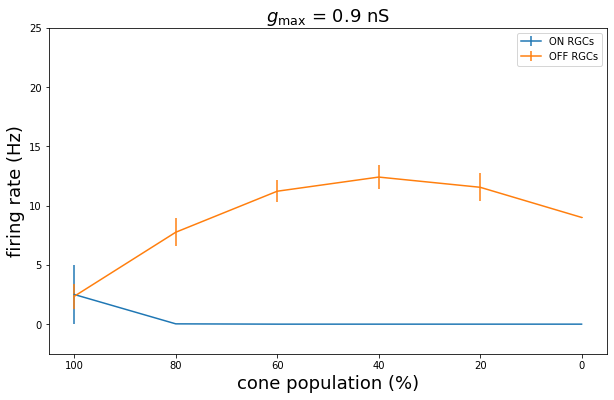

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

cone_population = list(reversed(["0", "20", "40", "60", "80", "100"]))

ax.errorbar(cone_population, on_fr_mean, yerr=on_fr_mean, label="ON RGCs")
ax.errorbar(cone_population, off_fr_mean, yerr=off_fr_std, label="OFF RGCs")
ax.set_ylim((-2.5,25))
ax.set_ylabel("firing rate (Hz)", fontsize=18)
ax.set_xlabel("cone population (%)", fontsize=18)
ax.set_title("$g_{\max}$ = 0.9 nS", fontsize=18)
ax.legend()
plt.savefig("new_plots/spon_rate_g_max_09_varying_cone.pdf")